## Domaine fréquentiel
Pyramides Gaussienne, Laplacien et filtre fréquentiel

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.transform import resize
from scipy import signal

## Exercice 1
Créer une fonction qui construit une pyramide gaussianne de **n** niveaux pour **img**.
> Pour les échantillonages, vous pouvez utiliser `skimage.transform.resize` ou faire des bonds sur les index comme vu précédamment (ex: `::2`)

In [5]:
def pyramide_gaussienne(img, n=5):
    pyramide = [img]
    
    # TODO
    for i in range(n - 1):
        # sous echantillonage
        niveau = pyramide[i][::2, ::2]
        
        # filtre gaussian
        niveau = gaussian(niveau, sigma=3)
        
        pyramide.append(niveau)
    
    return pyramide

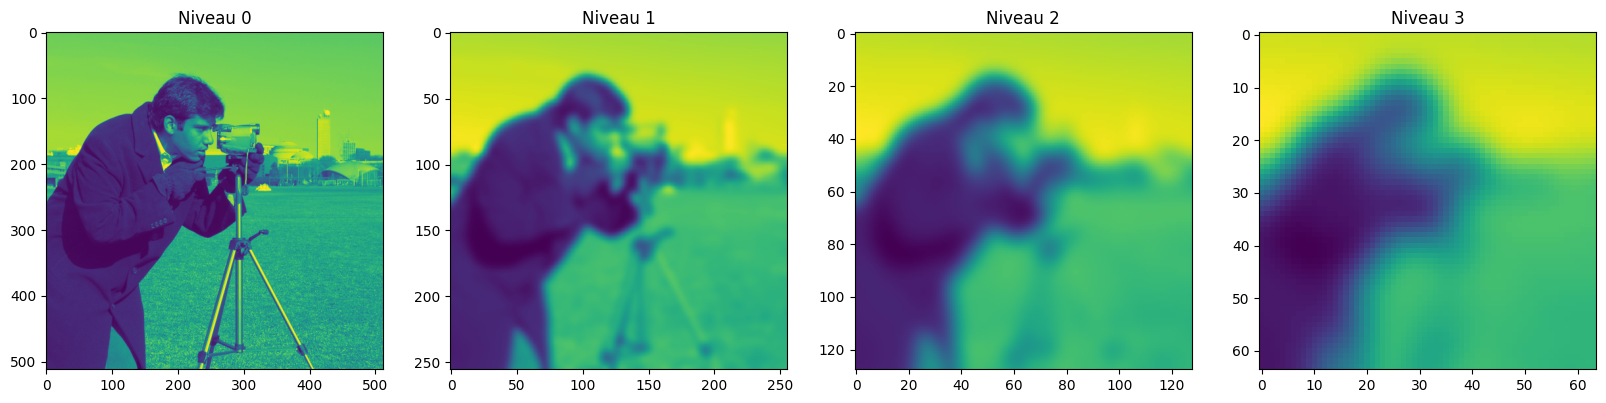

In [6]:
# Testez votre fonction ici
img = data.camera()
n = 4
p_gaussienne = pyramide_gaussienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_gaussienne[i])
    plt.title('Niveau ' + str(i))
    
plt.show()

## Exercice 2
Créer une fonction qui construit une pyramide laplacienne de **n** niveaux pour **img**.
> Je vous recommende d'utiliser votre implémentation de la pyramide gaussienne pour sauver du temps.

In [7]:
def pyramide_laplacienne(img, n=5):
    pyramide = []
    
    # TODO
    p_gaussienne = pyramide_gaussienne(img, n)
    for i in range(n - 1):
        # Sur echantillonage
        niveau = np.zeros(p_gaussienne[i].shape)
        niveau[::2, ::2] = p_gaussienne[i+1]
        
        # Difference
        niveau = np.abs(niveau - p_gaussienne[i])
        
        pyramide.append(niveau)
    
    pyramide.append(p_gaussienne[-1])
    
    return pyramide

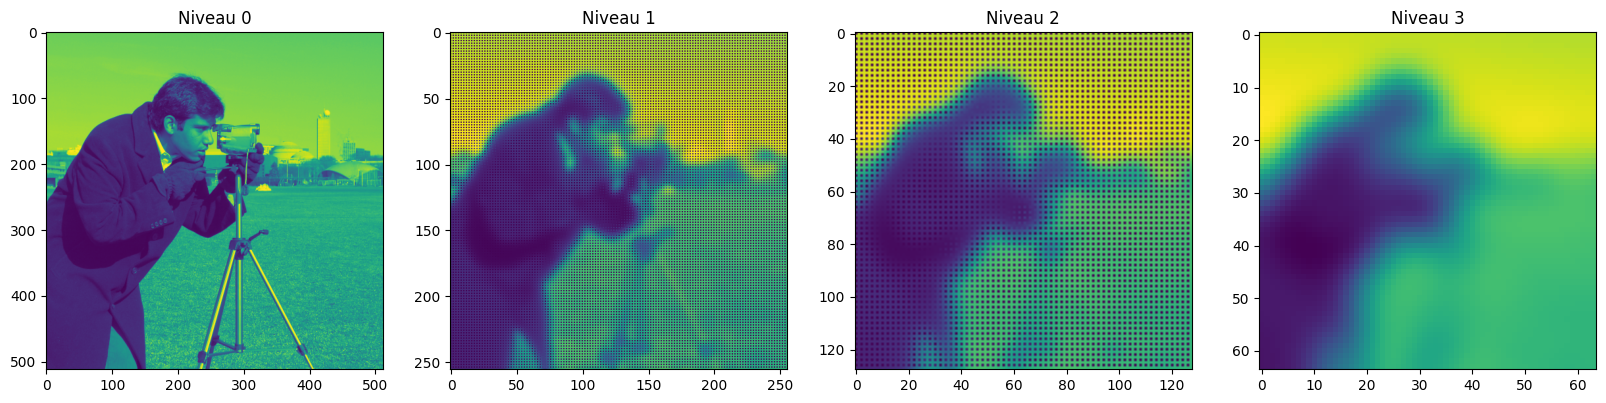

In [8]:
# Testez votre fonction ici
n = 4
p_laplacienne = pyramide_laplacienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_laplacienne[i])
    plt.title('Niveau ' + str(i))

In [13]:
def reconstruction_pyramide_laplace(images):
    """ Reconstruction d'une image monochrome à partir d'une pyramide de Laplace.
    Paramètre d'entrée
    ------------------
    images : list
        Pyramide de Laplace sous forme d'une liste d'images

    Paramètre de sortie
    -------------------
    img : ndimage
        Image monochrome reconstruite
    """
    # Nombre de niveaux de décomposition
    N = len(images)
    print(N)
    # On commence avec le dernier niveau (l'image floue)
    img = images[-1]
    
    for i_level in reversed(range(1, N)):
        x, y = images[i_level - 1].shape
        test = np.zeros((x,y))
        test[::2, ::2] = img
        img = images[i_level - 1] + test

    return img

4


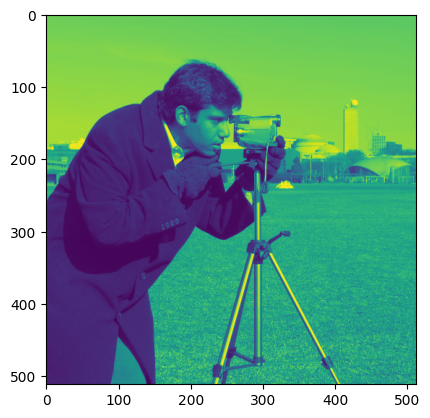

In [14]:
plt.imshow(reconstruction_pyramide_laplace(p_laplacienne))

## Exercice 3
Appliquer ce filtre gaussien **filter_2D** sur **img** aux numéros précédants dans le domaine fréquentiel.
> **Rappel:** une convolution dans le domaine fréquentiel est équivalent à une multiplication dans le domaine fréquentiel.

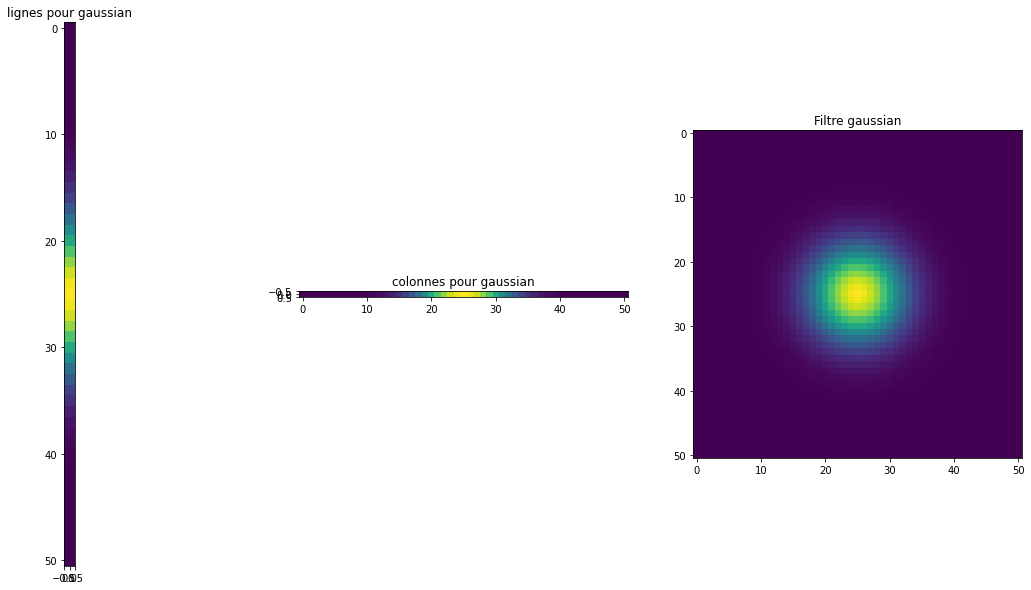

In [83]:
# Création du filtre
plt.figure(figsize=(20,10))

hs = 25
filter_1D = signal.gaussian(2 * hs + 1, 5)

plt.subplot(131)
filter_line = filter_1D.reshape((2 * hs + 1, 1))
plt.imshow(filter_line); plt.title('lignes pour gaussian')

plt.subplot(132)
filter_column = filter_1D.reshape((1, 2 * hs + 1))
plt.imshow(filter_column); plt.title('colonnes pour gaussian')

plt.subplot(133)
filter_2D = filter_line * filter_column
plt.imshow(filter_2D); plt.title('Filtre gaussian')

plt.show()

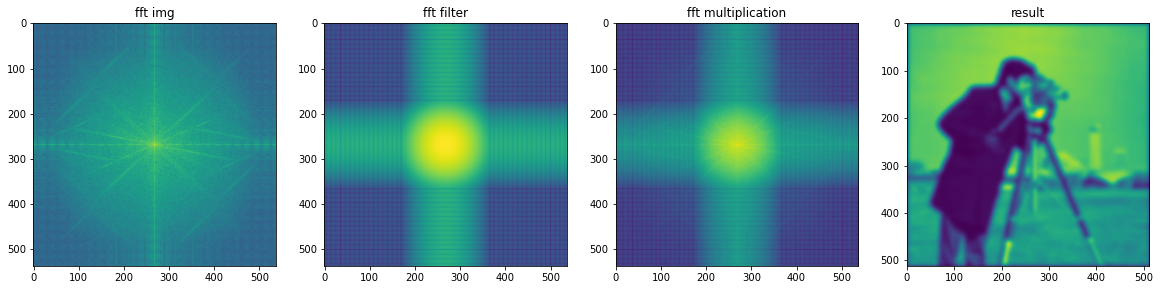

In [123]:
plt.figure(figsize=(20,20))

fftsize = np.array(img.shape) + hs

# fft img
plt.subplot(141)
img_fft = np.fft.fft2(img, fftsize)
plt.imshow(np.fft.fftshift(np.log(np.abs(img_fft)))); plt.title('fft img')

# fft filter
plt.subplot(142)
filter_fft = np.fft.fft2(filter_2D, fftsize)
plt.imshow(np.fft.fftshift(np.log(np.abs(filter_fft)))); plt.title('fft filter')

# fft multiplication
plt.subplot(143)
filtered_fft = img_fft * filter_fft
plt.imshow(np.fft.fftshift(np.log(np.abs(filtered_fft)))); plt.title('fft multiplication')

# ifft result
plt.subplot(144)
result = np.fft.ifft2(filtered_fft, fftsize)
plt.imshow(result.real[hs:, hs:]); plt.title('result')

plt.show()